## 使用PCA对数据进行降噪

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

digits = datasets.load_digits()
X = digits.data
y = digits.target

In [3]:
noisy_digits = X + np.random.normal(0, 4, size=X.shape)

In [4]:
example_digits = noisy_digits[y==0,:][:10]
for num in range(1,10):
    example_digits = np.vstack([example_digits, noisy_digits[y==num,:][:10]])

In [5]:
example_digits.shape

(100, 64)

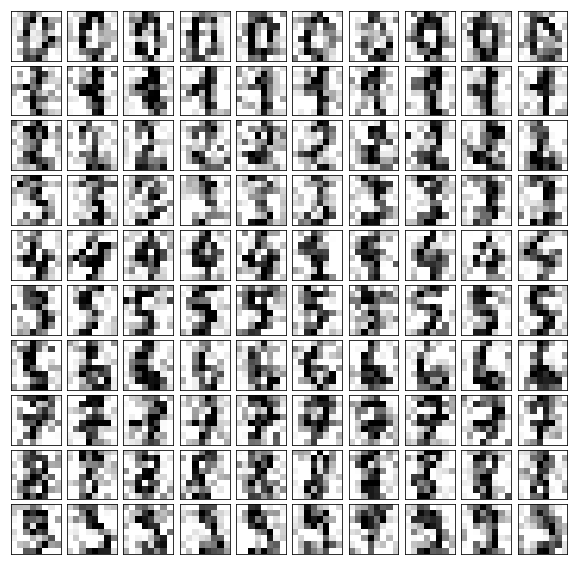

In [6]:
def plot_digits(data):
    fig, axes = plt.subplots(10, 10, figsize=(10, 10),
                             subplot_kw={'xticks':[], 'yticks':[]},
    gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))

    plt.show()
    
plot_digits(example_digits)

In [8]:
from sklearn.decomposition import PCA

pca = PCA(0.5).fit(noisy_digits)
pca.n_components_

12

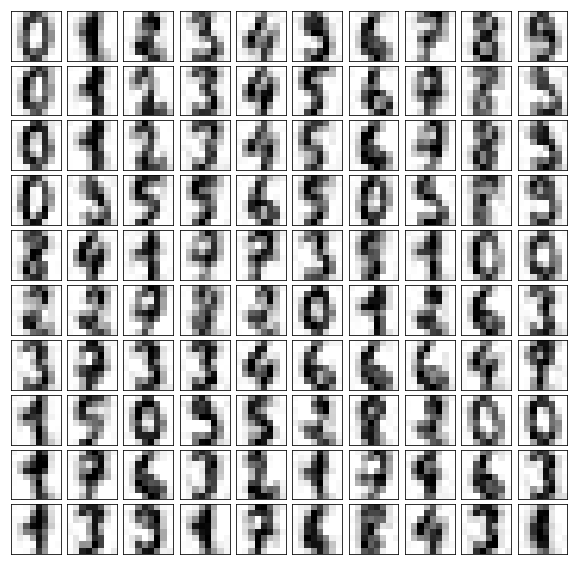

In [9]:
X_reduction = pca.transform(X)
X_filtered = pca.inverse_transform(X_reduction)
plot_digits(X_filtered)